# Poznań - Real estate market analysis

## 1. Introduce

Main purpose this document is understanding of situation on Poznan flat market. User of this document can analyse data by himself and also take a look into mine findings 
summaries. It's not full market analyse - I have focused only on interesting for me variables and relationships. Have fun!

## 2. Used libraries for analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import style
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 10=px; }</style>"))
style.use("ggplot")

## 3. User-definied functions
Below you can see two functions <i>Range</i> and <i>Histogram</i>. Function <i>Range</i> add to our dataset new column with surfaces ranges.

In [29]:
def Range(surface):
    """Function for creating surface ranges"""
    df = pd.DataFrame(surface)
    list_values = []
    for value in surface.values:
        if value<31:
            list_values.append("0-30")
        elif value<41:
            list_values.append("31-40")
        elif value<51:
            list_values.append("41-50")
        elif value<61:
            list_values.append("51-60")
        elif value<71:
            list_values.append("61-70")
        elif value<81:
            list_values.append("71-80")
        elif value<101:
            list_values.append("81-100")
        elif value is None:
            list_values.append("N/A")
        else:
            list_values.append(">100")
    df["PRZEDZIAŁ_POW"] = list_values
    return df["PRZEDZIAŁ_POW"]

Function <i>Histogram</i> is little more complex - returns histogram for input data.In <i>Histogram</i> you can insert values to filter data it can be price, year of building flat, market type, flat surface, number of rooms and district. But for your comfort I have created special sliders so you don't have to type.

In [30]:
def Histogram(variable, dataset, price_min = 200000, price_max = 500000, 
              start_year = 1990, end_year = 2020, market = "pierwotny", 
              min_surface = 30, max_surface = 60, min_rooms = 2, 
              max_rooms = 4, dzielnica = "Stare Miasto"):
    """function for plotting histograms, analyse assumptions that price is lowest than 500 000 PLN"""
    
    dataset_hist = dataset[(dataset["CENA"] >= price_min) & (dataset["CENA"] <= price_max)]
    dataset_hist = dataset_hist[(dataset_hist["ROK_BUDOWY"] >= start_year) & (dataset_hist["ROK_BUDOWY"] <= end_year)]                                                                     
    dataset_hist = dataset_hist[(dataset_hist["RYNEK"] == market)]                                                                       
    dataset_hist = dataset_hist[(dataset_hist["POWIERZCHNIA"] >= min_surface) & (dataset_hist["POWIERZCHNIA"] <= max_surface)]                                                                          
    dataset_hist = dataset_hist[(dataset_hist["POKOJE"] >= min_rooms) & (dataset_hist["POKOJE"] <= max_rooms)]
    dataset_hist = dataset_hist[dataset_hist["DZIELNICA"] == dzielnica]
    dataset_hist.hist(column=variable)
    #if variable in ("RYNEK","PRZEDZIAŁ_POW", "DZIELNICA"):
    #    dataset_hist = dataset_hist[variable]
    #    dataset_hist.value_counts().plot(kind = "bar", title = variable)
    #else:
    return plt.show()

In [31]:
dataset = pd.read_csv("C:/Users/Przemek/PycharmProjects/Real estate scrapping OtoDom/real_estate_data.csv", sep=";",
                      index_col=2)
dataset = pd.DataFrame(dataset)

In [32]:
dataset = dataset[~dataset.index.duplicated(keep="first")]

In [33]:
dataset["PRZEDZIAŁ_POW"] = Range(dataset["POWIERZCHNIA"])

In [34]:
print("Overall statistic of dataset:" ,
      "\nNumber of offers: ", len(dataset.index),
      "\nAverage price for square meter: ", round(dataset["CENA_M2"].mean(),2),
      "\nAverage surface of flat: ", round(dataset["POWIERZCHNIA"].mean(),2),
      "\nAverage price: ", round(dataset["CENA"].mean(),2),
      "\nMax price: ", max(dataset["CENA"]),
      "\nMin price: ", min(dataset["CENA"])
      )


Overall statistic of dataset: 
Number of offers:  3214 
Average price for square meter:  6510.61 
Average surface of flat:  60.16 
Average price:  386196.84 
Max price:  5756000.0 
Min price:  99000.0


In [35]:
analysis_headers = ["CENA", "CENA_M2", "POWIERZCHNIA", "POKOJE", "ROK_BUDOWY", "DZIELNICA"]
district_headers = ['Antoninek','Zieliniec','Kobylepole','Chartowo','Fabianowo','Kotowo','Główna','Głuszyna',
                     'Górczyn','Grunwald','Jana III Sobieskiego','Jeżyce','Junikowo','Kiekrz','Krzesiny','Pokrzywno',
                     'Garaszewo','Krzyżowniki','Smochowice','Kwiatowe','Ławica','Morasko','Radojewo','Naramowice',
                     'Winogrady','Ogrody','Ostrów Tumski','Śródka','Zawady','Komandoria','Piątkowo','Podolany',
                     'Rataje','Sołacz','Stare Miasto','Stare Winogrady','Starołęka','Minikowo','Marlewo',
                     'Stary Grunwald','Strzeszyn','Szczepankowo','Spławie','Krzesinki','Łazarz','Świerczewo',
                     'Umultowo','Warszawskie','Pomet','Maltańskie','Wilda','Winiary','Wola','Zielony Dębiec',
                     'Żegrze','Dębiec']

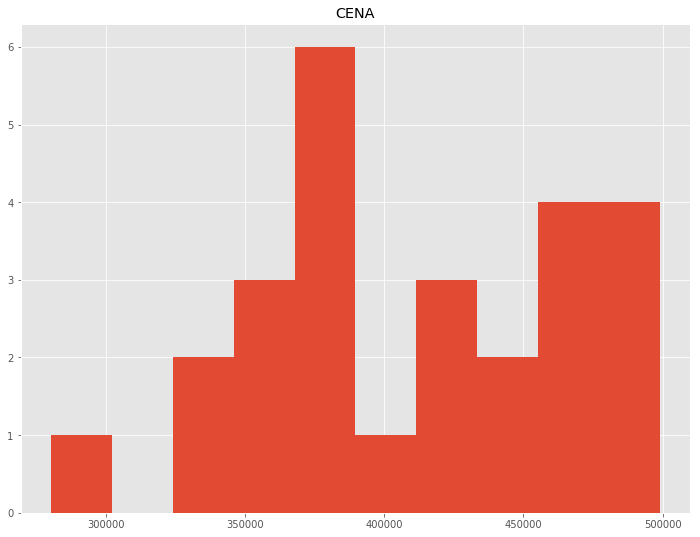

<function __main__.Histogram>

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,9]
interact(Histogram,variable = analysis_headers, dataset = fixed(dataset), 
         price_min = widgets.IntSlider(min = 0, max = 1000000, step = 20000, value = 200000),
         price_max = widgets.IntSlider(min = 0, max = 1000000, step = 20000, value = 500000),
        start_year = widgets.IntSlider(min = 1990, max = 2020, step = 1, value = 2000),
        end_year = widgets.IntSlider(min = 1990, max = 2020, step = 1, value = 2020),
        market = ["pierwotny", "wtórny"],
        dzielnica = district_headers)
